In [60]:
import pandas as pd
import requests as r
import matplotlib.pyplot as plt

from ohsome import OhsomeClient
client = OhsomeClient()

In [66]:
# get osm way ids from uber csv file

# adjust the file for another time range
uber_df = pd.read_csv("movement-speeds-quarterly-by-hod-nairobi-2018-Q2.csv")
display(uber_df.head())

osm_way_ids = list(set(uber_df["osm_way_id"].to_list()))
print(len(osm_way_ids))

,year,quarter,hour_of_day,segment_id,start_junction_id,end_junction_id,osm_way_id,osm_start_node_id,osm_end_node_id,speed_kph_mean,speed_kph_stddev,speed_kph_p50,speed_kph_p85
0,2018,2,23,30e4fc323c08f3a08a0130ae6c8a87c937c324c6,6caabdcf9d391f42f6967297d5801c0d630c457c,fb8781126227857a7245b5471dcc2435c3e30e6b,680377667,6274662665,5475093931,16.356,18.788,11.566,15.289
1,2018,2,21,30e4fc323c08f3a08a0130ae6c8a87c937c324c6,6caabdcf9d391f42f6967297d5801c0d630c457c,fb8781126227857a7245b5471dcc2435c3e30e6b,680377667,6274662665,5475093931,10.884,4.919,10.102,13.115
2,2018,2,22,30e4fc323c08f3a08a0130ae6c8a87c937c324c6,6caabdcf9d391f42f6967297d5801c0d630c457c,fb8781126227857a7245b5471dcc2435c3e30e6b,680377667,6274662665,5475093931,10.598,5.282,9.566,12.316
3,2018,2,18,41297ea07006246e330f9767862c5b85167eb37a,d97c55174d6c011dcd2bf3d1e05629b09dba739b,a996c01a24deb369c03c19b95b587a688ab2f9b8,8462710,3716534178,6287511790,19.508,11.973,17.753,23.377
4,2018,2,17,41297ea07006246e330f9767862c5b85167eb37a,d97c55174d6c011dcd2bf3d1e05629b09dba739b,a996c01a24deb369c03c19b95b587a688ab2f9b8,8462710,3716534178,6287511790,19.006,12.160,17.495,22.894


4419


timestamp with max road network length: 2019-06-01 00:00:00+00:00


Text(0.5, 1.0, 'OSM road length with Uber measurements')

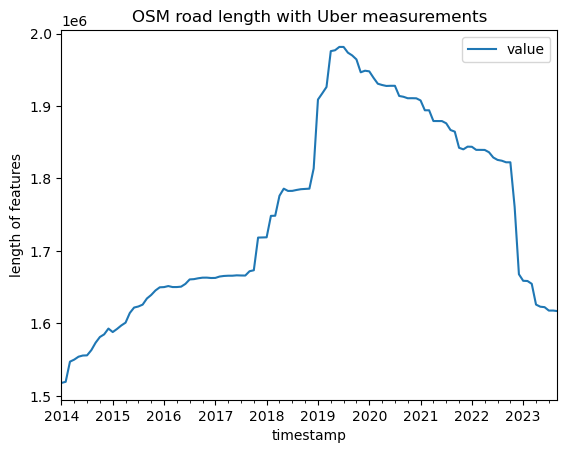

In [63]:
# query ohsome api for osm way ids

URL = 'https://api.ohsome.org/v1/elements/length'

nairobi_bbox = [36.664702, -1.444882, 37.104873, -1.160675]
osm_way_ids_text = str(osm_way_ids).strip('[').strip(']')

uber_road_length = client.post(
    endpoint="elements/length",
    bboxes=nairobi_bbox,
    time="2014-01-01/2023-09-01/P1M",
    filter=f"type:way and id:({osm_way_ids_text})"
)

uber_road_length_df = uber_road_length.as_dataframe()

print(f"timestamp with max road network length: {response_df['value'].idxmax()}")

response_df.plot(ylabel="length of features")
plt.title("OSM road length with Uber measurements")

type:way and highway in (trunk, residential, tertiary_link, secondary, tertiary, motorway_link, secondary_link, primary, service, motorway, primary_link, unclassified, trunk_link)


Text(0.5, 1.0, 'total OSM road length')

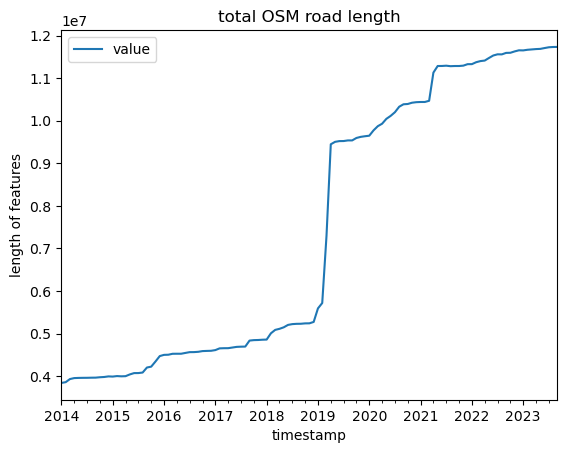

In [65]:
# for how many roads do we have uber measurements
# timestamp as above
# break down by road type
highway_tag_values = list(set(elements_df["highway"].to_list()))
highway_tag_values_text = str(highway_tag_values).strip('[').strip(']').replace("'", "")

print(f"type:way and highway in ({highway_tag_values_text})")

total_road_length = client.post(
    endpoint="elements/length",
    bboxes=nairobi_bbox,
    time="2014-01-01/2023-09-01/P1M",
    filter=f"type:way and highway in ({highway_tag_values_text})"
)
total_road_length_df = total_road_length.as_dataframe()
total_road_length_df.plot(ylabel="length of features")
plt.title("total OSM road length")

Text(0.5, 1.0, 'all OSM roads')

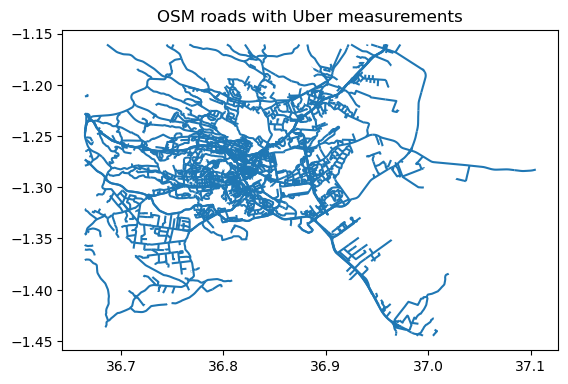

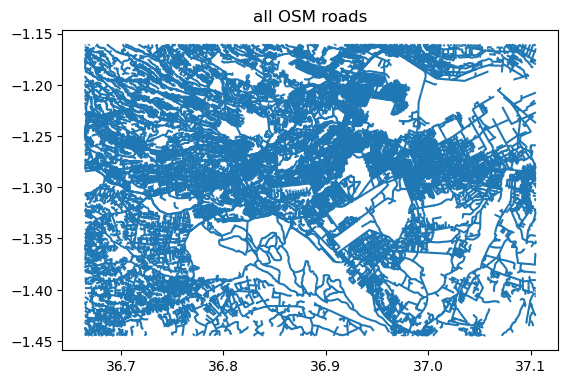

In [61]:
# plot elements on map
timestamp = "2019-06-01"

uber_osm_roads = client.elements.geometry.post(
    bboxes=nairobi_bbox,
    time=timestamp,
    filter=f"type:way and id:({osm_way_ids_text})",
    properties="tags"
)

# you can also open the geojson in qgis
uber_osm_roads.to_json(f"./uber_roads_{timestamp}.geojson")

elements_df = uber_osm_roads.as_dataframe()
elements_df.plot()
plt.title("OSM roads with Uber measurements")

total_osm_roads = client.elements.geometry.post(
    bboxes=nairobi_bbox,
    time=timestamp,
    filter=f"type:way and highway in ({highway_tag_values_text})",
    properties="tags"
)

total_osm_roads.to_json(f"./all_roads_{timestamp}.geojson")
all_elements_df = total_osm_roads.as_dataframe()
all_elements_df.plot()
plt.title("all OSM roads")

,tag,timestamp_all_osm,value_all_osm,timestamp_uber_osm,value_uber_osm,uber_measurement_ratio
0,highway=motorway,2019-06-01 00:00:00+00:00,105706.67,2019-06-01 00:00:00+00:00,105448.00,0.997553
1,highway=motorway_link,2019-06-01 00:00:00+00:00,22394.48,2019-06-01 00:00:00+00:00,22394.48,1.000000
2,highway=primary,2019-06-01 00:00:00+00:00,106891.48,2019-06-01 00:00:00+00:00,106891.48,1.000000
3,highway=primary_link,2019-06-01 00:00:00+00:00,12360.88,2019-06-01 00:00:00+00:00,12266.08,0.992331
4,highway=residential,2019-06-01 00:00:00+00:00,7218560.63,2019-06-01 00:00:00+00:00,625789.58,0.086692
5,highway=secondary,2019-06-01 00:00:00+00:00,328769.25,2019-06-01 00:00:00+00:00,325823.48,0.991040
6,highway=secondary_link,2019-06-01 00:00:00+00:00,10319.94,2019-06-01 00:00:00+00:00,10161.65,0.984662
7,highway=service,2019-06-01 00:00:00+00:00,412962.10,2019-06-01 00:00:00+00:00,11522.02,0.027901
8,highway=tertiary,2019-06-01 00:00:00+00:00,340087.65,2019-06-01 00:00:00+00:00,289205.19,0.850384
9,highway=tertiary_link,2019-06-01 00:00:00+00:00,2594.55,2019-06-01 00:00:00+00:00,2429.79,0.936498


<AxesSubplot:xlabel='tag'>

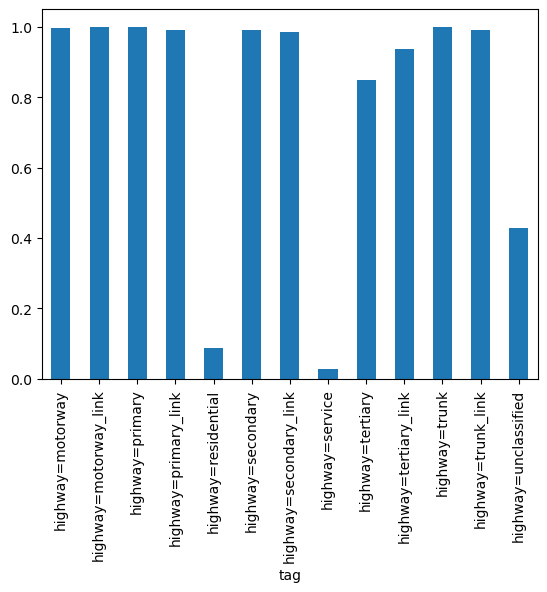

In [84]:
# compare for 2019-06-01 for tag value
timestamp = "2019-06-01"

response = client.elements.length.groupByTag.post(
    bboxes=nairobi_bbox,
    time=timestamp,
    filter=f"type:way and id:({osm_way_ids_text})",
    groupByKey="highway",
    groupByValues=highway_tag_values_text
)
uber_by_tag_df = response.as_dataframe()

response = client.elements.length.groupByTag.post(
    bboxes=nairobi_bbox,
    time=timestamp,
    filter=f"type:way and highway in ({highway_tag_values_text})",
    groupByKey="highway",
    groupByValues=highway_tag_values_text
)
all_by_tag_df = response.as_dataframe()

join_df = all_by_tag_df.reset_index().merge(
    uber_by_tag_df.reset_index(),
    left_on="tag",
    right_on="tag",
    suffixes=('_all_osm', '_uber_osm')
)

join_df["uber_measurement_ratio"] = join_df["value_uber_osm"] / join_df["value_all_osm"] 

display(join_df)
join_df.plot.bar(
    x='tag',
    y='uber_measurement_ratio',
    rot=90,
    legend=False
)

,,geometry,highway,ref,traffic_signals,created_by,access,barrier,source,name,designation,...,horse,motorcar,motorcycle,crossing,addr:city,addr:street,entrance,enforcement,junction,bridge:support
@osmId,@snapshotTimestamp,,,,,,,,,,,,,,,,,,,,,
node/1005377927,2019-06-01,POINT (36.93687 -1.18216),NaN,NaN,NaN,NaN,NaN,gate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/1026964125,2019-06-01,POINT (36.90552 -1.28701),NaN,NaN,NaN,NaN,NaN,gate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/1026985847,2019-06-01,POINT (36.74339 -1.26377),NaN,NaN,NaN,NaN,NaN,gate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/1087053743,2019-06-01,POINT (36.94588 -1.36455),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/1102335113,2019-06-01,POINT (36.77886 -1.29611),NaN,NaN,NaN,NaN,NaN,gate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
node/694431165,2019-06-01,POINT (36.70725 -1.32322),NaN,NaN,NaN,NaN,NaN,gate,NaN,NaN,NaN,...,yes,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/81356873,2019-06-01,POINT (36.80295 -1.29874),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/842079798,2019-06-01,POINT (36.86176 -1.23645),NaN,NaN,NaN,NaN,NaN,gate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'OSM roads nodes with Uber measurements')

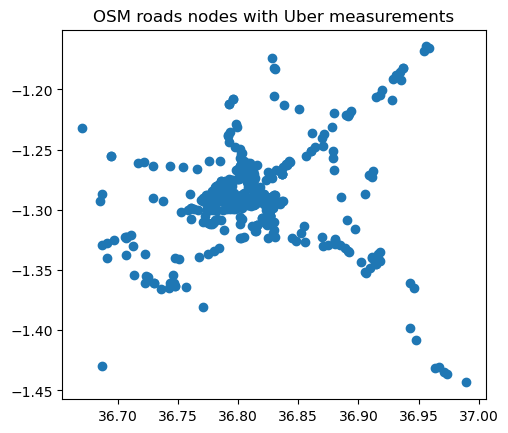

In [91]:
# this is not giving all nodes
# ohsome DOES NOT return nodes without any tags


# download all osm nodes

# get all osm node ids from uber csv file
osm_node_ids = list(set(uber_df["osm_start_node_id"].to_list() + uber_df["osm_end_node_id"].to_list()))

timestamp = "2019-06-01"
nairobi_bbox = [36.664702, -1.444882, 37.104873, -1.160675]
osm_node_ids_text = str(osm_node_ids).strip('[').strip(']')

uber_osm_roads_nodes = client.elements.geometry.post(
    bboxes=nairobi_bbox,
    time=timestamp,
    filter=f"type:node and id:({osm_node_ids_text})",
    properties="tags"
)


# you can also open the geojson in qgis
uber_osm_roads_nodes.to_json(f"./uber_roads_nodes_{timestamp}.geojson")

elements_df = uber_osm_roads_nodes.as_dataframe()

display(elements_df)

elements_df.plot()
plt.title("OSM roads nodes with Uber measurements")

In [96]:
osm_node_ids = list(set(uber_df["osm_start_node_id"].to_list() + uber_df["osm_end_node_id"].to_list()))

osm_node_ids_text = str(osm_node_ids).strip('[').strip(']')

print(osm_node_ids_text.replace(' ', ''))


1506607104,2473361411,1940979718,616169479,6364594184,1107722248,2056617991,1107722251,6030196747,1940979721,1107722249,6030196746,1107722256,6030196755,1940979733,1940979735,2056618009,2056618010,1940979739,1940979742,6318194718,1940979745,6030196774,260341799,6362595367,6362595373,6030196782,6362595375,1940979759,6318194737,2056618033,1940979762,6166118453,1940979768,616169530,6305448001,6166118466,1140752452,6166118469,2473361479,1140752455,6166118472,6166118475,1140752460,2145321037,3675553870,1140752462,1940979797,5792235609,1940979802,5792235611,2473361500,5792235613,6276251743,5792235615,1940979809,6301319272,6372163690,2473361514,1940979819,6372163693,1940979825,1940979832,2473361535,6327140480,6327140484,2473361540,2473361545,1940979853,1940979858,1940979859,2348744857,6276251802,6276251807,671875232,1940979874,280690851,280690853,1940979882,1940979883,2348744877,6351388846,6351388847,6351388848,6276251825,1940979890,1122533559,1940979898,6257836220,1122533567,1122533568,53527